In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.exploratory import split, get_correlations
from src.models import *
from scipy import stats

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
path = "./data/data_shifted.csv"
data = pd.read_csv(path)
data.drop(["Unnamed: 0"], axis=1, inplace=True)
data # Predictors are from 2007 to 2015; outcome is from 2008 to 2016

,fips,year,pm25,poverty,popdensity,medianhousevalue,pct_blk,medhouseholdincome,pct_owner_occ,hispanic,...,Drug_Abuse/Substance_Abuse,HIV/AIDS,Heart_Failure,Hepatitis_(Chronic_Viral_B_&_C),Hyperlipidemia,Hypertension,Ischemic_Heart_Disease,Osteoporosis,Schizophrenia/Other_Psychotic_Disorders,Stroke
0,36103,2007,11.737357,0.047382,1945.049628,506509.646125,0.048875,90781.587302,0.834030,0.105628,...,0.3,0.1,20.8,0.3,51.6,63.8,42.0,7.9,1.8,5.8
1,36103,2008,10.795175,0.047349,1942.548304,506122.762671,0.048704,90873.962264,0.833869,0.105376,...,0.4,0.1,20.1,0.3,53.8,64.9,42.1,8.4,1.8,5.8
2,36103,2009,9.201804,0.047117,1946.216053,503739.080592,0.048918,90848.824490,0.833427,0.105882,...,0.3,0.1,19.7,0.3,55.7,65.8,42.4,8.8,1.8,5.7
3,36103,2010,9.106633,0.047268,1946.895602,502299.171839,0.048938,90946.217778,0.832811,0.106161,...,0.4,0.1,19.4,0.3,57.3,66.1,41.9,9.4,1.8,5.5
4,36103,2011,9.120639,0.047716,1945.335549,510830.523810,0.048919,90295.504762,0.835889,0.104793,...,0.4,0.1,18.9,0.3,58.6,65.9,40.8,9.2,1.8,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27868,53003,2011,3.591937,0.103381,45.274356,189400.000000,0.001553,39924.333333,0.794463,0.017838,...,0.7,0.0,18.4,0.0,41.6,50.7,26.4,6.1,1.5,0.0
27869,53003,2012,5.335512,0.102311,45.577960,213100.000000,0.001744,52672.333333,0.782779,0.017013,...,0.6,0.0,17.3,0.0,40.3,51.1,25.3,6.0,2.0,0.0
27870,53003,2013,4.373473,0.160106,45.776529,194100.000000,0.002042,52577.333333,0.778103,0.017984,...,1.0,0.0,16.2,0.0,41.5,50.7,25.7,5.5,1.8,0.0
27871,53003,2014,3.593917,0.136517,45.931765,191366.666667,0.002062,52609.000000,0.782290,0.017345,...,1.0,0.0,16.7,0.3,39.8,51.4,26.1,4.4,1.7,0.0


Standardizing predictors does wonders for model performance.

In [4]:
X_train, X_test, y_train, y_test = split(data, standardize=True)

In [5]:
# X_train, X_test, y_train, y_test = split(data, standardize=False)

### Regression models

#### OLS, polynomial degree = 2

In [6]:
ols_model, ols_train_pred, ols_test_pred, ols_mse_train, ols_mse_test, ols_adj_r2_train, ols_adj_r2_test, ols_coefficients = lin_reg(X_train, X_test, y_train, y_test, degree=2)
print("Training MSE: {}".format(ols_mse_train))
print("Test MSE: {}".format(ols_mse_test))
print("Training adjusted R\u00b2: {}".format(ols_adj_r2_train))
print("Test adjusted R\u00b2: {}".format(ols_adj_r2_test))

Training MSE: 5.946702359722112
Test MSE: 6.14720655032082
Training adjusted R²: 0.7667320728954188
Test adjusted R²: 0.7554003132039089


In [7]:
ols_coefficients

{'population': -1.5975458938600797,
 'popdensity : pct_blk': 1.3678952193786293,
 'pct_blk': -1.2612408988379689,
 'population : Cancer': 1.2239972454929577,
 'pct_white : Hypertension': 1.1370248193378782,
 'Ischemic_Heart_Disease': 1.1165811474152372,
 'popdensity : pct_native': 1.1027702479861021,
 'Hypertension': 0.9636042743031599,
 'medianhousevalue : pct_blk': -0.9076928915878303,
 'pct_white : Hyperlipidemia': -0.8382810122153552,
 'Diabetes': 0.8098239801681667,
 'popdensity : pct_white': 0.7766323644352687,
 'pm25 : pct_white': -0.7736307652767759,
 'popdensity': -0.7461567207624091,
 'Heart_Failure': 0.7458944565255947,
 'pct_native : pct_white': -0.7099412300348338,
 'popdensity : Arthritis': -0.7071063816327888,
 'Autism_Spectrum_Disorders : Cancer': -0.703259381559858,
 'pm25 : pct_blk': -0.6805732950523221,
 'popdensity : hispanic': 0.6798278865473222,
 'Alcohol_Abuse': 0.6542463120434749,
 'pct_blk : Diabetes': -0.6401762783270468,
 'medhouseholdincome': -0.628754064907

Linear regression with 2nd degree polynomials and interactions fit better than 1st degree (not shown) with minimal overfitting. Here we are squaring all predictors and interacting all pairwise predictors.

#### Check linear regression assumptions

##### Normality

In [8]:
# See if residuals are normally distributed. H0: normal vs. H1: not normal
shapiro_test = stats.shapiro(ols_test_pred - y_test)
#shapiro_test.statistic
shapiro_test.pvalue

0.0

In [9]:
(ols_test_pred-y_test).mean()

0.08551099357559959

Residuals are not normal even with polynomial terms; for predictions, linear regression may be ok, but we cannot use the coefficients for inference

##### Equal variance

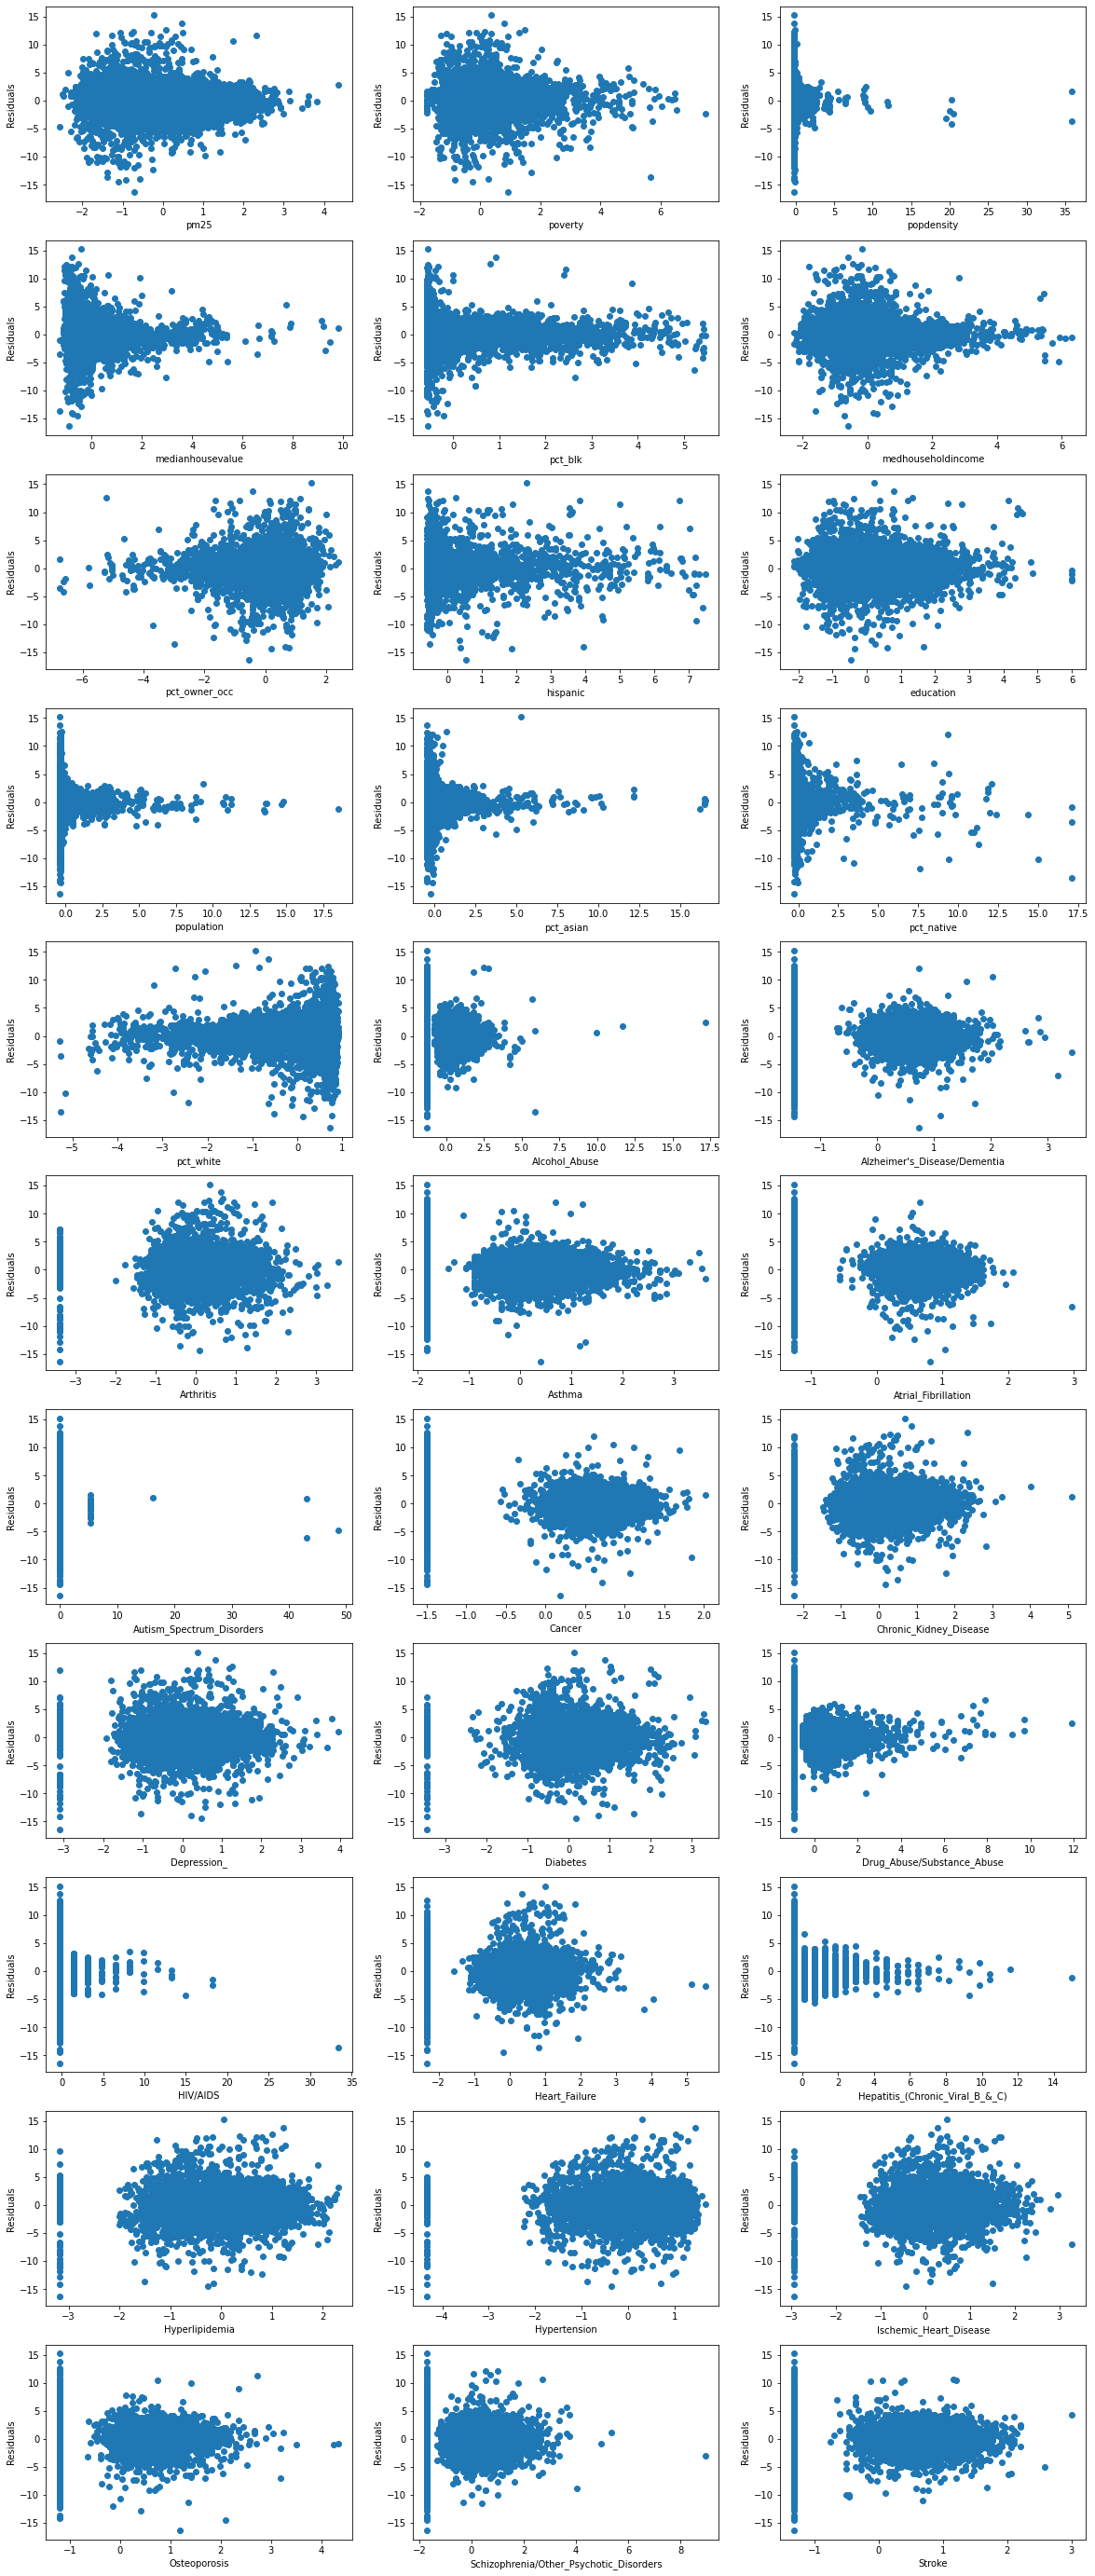

In [10]:
plt.figure(figsize=(20, 50))
for i in range(33):
    plt.subplot(11, 3, i+1)
    plt.scatter(X_test.iloc[:, i], ols_test_pred - y_test)
    plt.xlabel(X_test.iloc[:, i].name)
    plt.ylabel("Residuals")

Outcome is quite heteroscedastic. We may want to use sandwich standard errors.

#### Huber, polynomial degree = 2

In [11]:
huber_model, huber_train_pred, huber_test_pred, huber_mse_train, huber_mse_test, huber_coefficients = huber_reg(X_train, X_test, y_train, y_test, degree=2)
print("Training MSE: {}".format(huber_mse_train))
print("Test MSE: {}".format(huber_mse_test))

Training MSE: 7.16366455825443
Test MSE: 6.990443607397901


In [12]:
huber_coefficients

{'1': 3.906051131432022,
 'medhouseholdincome': -0.9067952069073623,
 'Ischemic_Heart_Disease': 0.906632622347483,
 'Cancer^2': 0.8606335269185406,
 'Diabetes': 0.812009375215838,
 'medianhousevalue': -0.7739386896886056,
 'Atrial_Fibrillation^2': 0.763099663476873,
 'Cancer': 0.7256764707274429,
 'pct_blk': -0.6343704210558326,
 'Heart_Failure': 0.6231466049290387,
 'Alcohol_Abuse': 0.576636622733447,
 'Asthma': 0.5418391132097164,
 'popdensity': -0.5068468836460357,
 'hispanic': -0.5030125894191914,
 "Alzheimer's_Disease/Dementia^2": 0.4832608797735191,
 'pct_asian': -0.44943978170329996,
 'Stroke': 0.44292487677421377,
 'Chronic_Kidney_Disease : Heart_Failure': -0.4398815878282108,
 'population': -0.4285225247143386,
 'HIV/AIDS': -0.4105337844182217,
 'pct_white': 0.40410746749629073,
 'Hepatitis_(Chronic_Viral_B_&_C)': -0.3851053353080678,
 "Alzheimer's_Disease/Dementia": 0.37928598706364086,
 'Stroke^2': 0.3724330671238483,
 'Arthritis': 0.3319208294157623,
 'Drug_Abuse/Substance_

**Correlations**

In [13]:
correlations = get_correlations(X_train)
correlations

,PCC,p-value
Diabetes vs. Hypertension,0.805636,0.0
Hyperlipidemia vs. Hypertension,0.804571,0.0
Diabetes vs. Hyperlipidemia,0.737269,0.0
Heart_Failure vs. Ischemic_Heart_Disease,0.730901,0.0
Diabetes vs. Ischemic_Heart_Disease,0.707327,0.0
Arthritis vs. Hypertension,0.702486,0.0
Arthritis vs. Diabetes,0.691126,0.0
Chronic_Kidney_Disease vs. Hyperlipidemia,0.679812,0.0
Arthritis vs. Ischemic_Heart_Disease,0.679331,0.0
Hypertension vs. Ischemic_Heart_Disease,0.679238,0.0


Many columns are correlated. We may want to try ridge regression. In practice we will run ridge, lasso, and elastic net.

#### Ridge, polynomial degree = 2

In [14]:
ridge_model, ridge_train_pred, ridge_test_pred, ridge_mse_train, ridge_mse_test, ridge_adj_r2_train, ridge_adj_r2_test, ridge_coefficients = ridge_reg(X_train, X_test, y_train, y_test, degree=2)
print("\n")
print("Training MSE: {}".format(ridge_mse_train))
print("Test MSE: {}".format(ridge_mse_test))
print("Training adjusted R\u00b2: {}".format(ridge_adj_r2_train))
print("Test adjusted R\u00b2: {}".format(ridge_adj_r2_test))

Lambda: 6.25055192527397


Training MSE: 5.947707498851431
Test MSE: 6.119597438781176
Training adjusted R²: 0.7666926448717908
Test adjusted R²: 0.7564988902535059


In [15]:
ridge_coefficients

{'population': -1.4353734904250244,
 'pct_blk': -1.166838135786172,
 'Ischemic_Heart_Disease': 1.1133574025556507,
 'population : Cancer': 1.0744008709900126,
 'popdensity : pct_blk': 0.9985818485452582,
 'pct_white : Hypertension': 0.9720039482327837,
 'Hypertension': 0.9357708383519703,
 'medianhousevalue : pct_blk': -0.8407478715303843,
 'Diabetes': 0.8122794271416772,
 'popdensity': -0.7602662254659602,
 'Heart_Failure': 0.7489546223333529,
 'pct_white : Hyperlipidemia': -0.7475653740095498,
 'pm25 : pct_white': -0.714995617889819,
 'Alcohol_Abuse': 0.6543709884336469,
 'medhouseholdincome': -0.6320802420395706,
 'pm25 : pct_blk': -0.6255911064484836,
 'popdensity : pct_native': 0.6121708806012552,
 'pct_native : pct_white': -0.5953161166311254,
 'popdensity : Arthritis': -0.5883669939517856,
 'medianhousevalue : pct_white': -0.5636512792398153,
 'pct_blk : Schizophrenia/Other_Psychotic_Disorders': 0.5634552608464577,
 'popdensity : hispanic': 0.5575545865037224,
 'pct_asian : pct_

#### Lasso, polynomial degree = 2

In [16]:
lasso_model, lasso_train_pred, lasso_test_pred, lasso_mse_train, lasso_mse_test, lasso_adj_r2_train, lasso_adj_r2_test, lasso_coefficients, lasso_non_important_coefs = lasso_reg(X_train, X_test, y_train, y_test, degree=2)
print("\n")
print("Training MSE: {}".format(lasso_mse_train))
print("Test MSE: {}".format(lasso_mse_test))
print("Training adjusted R\u00b2: {}".format(lasso_adj_r2_train))
print("Test adjusted R\u00b2: {}".format(lasso_adj_r2_test))
print("Number of non-important coefficients: {}".format(len(lasso_non_important_coefs)))

Lambda: 0.001


Training MSE: 5.972470056353788
Test MSE: 6.045340094271558
Training adjusted R²: 0.7657212980464466
Test adjusted R²: 0.759453618236156
Number of non-important coefficients: 93


In [17]:
lasso_coefficients

{'population': -1.1946808548718828,
 'Ischemic_Heart_Disease': 1.1041008651375022,
 'Hypertension': 0.8630816349481443,
 'Diabetes': 0.8174927274218013,
 'pct_blk': -0.8149000579732809,
 'Heart_Failure': 0.7764589349032021,
 'population : Cancer': 0.6533505239789392,
 'Alcohol_Abuse': 0.6486860671630915,
 'medhouseholdincome': -0.6400918457875504,
 'popdensity': -0.5526726526845817,
 'Arthritis': 0.5488816732508935,
 'Asthma': 0.5134911071874267,
 'pct_white : Hypertension': 0.4866478275400443,
 'hispanic': -0.4794741886507409,
 'pm25 : pct_white': -0.4667558636267242,
 'medianhousevalue : pct_blk': -0.4626263279536086,
 'pct_white : Drug_Abuse/Substance_Abuse': 0.4582682337569219,
 'pct_blk : Schizophrenia/Other_Psychotic_Disorders': 0.4506085663959273,
 'Atrial_Fibrillation^2': -0.4209840821426643,
 'pct_white : Hyperlipidemia': -0.41785151035561263,
 'pct_blk : Ischemic_Heart_Disease': -0.39391044890708105,
 'pm25 : pct_blk': -0.3912581758748829,
 'medianhousevalue': -0.388457102295

In [18]:
lasso_non_important_coefs

['1',
 'Autism_Spectrum_Disorders',
 'Chronic_Kidney_Disease',
 'HIV/AIDS',
 'pm25 : hispanic',
 'pm25 : education',
 'pm25 : Autism_Spectrum_Disorders',
 'pm25 : Diabetes',
 'pm25 : Stroke',
 'poverty : pct_blk',
 'poverty : population',
 'poverty : Autism_Spectrum_Disorders',
 'poverty : Hypertension',
 'popdensity : pct_owner_occ',
 'popdensity : education',
 'popdensity : pct_native',
 "popdensity : Alzheimer's_Disease/Dementia",
 'popdensity : Asthma',
 'popdensity : Atrial_Fibrillation',
 'popdensity : Diabetes',
 'popdensity : Hyperlipidemia',
 'popdensity : Hypertension',
 'popdensity : Ischemic_Heart_Disease',
 'popdensity : Osteoporosis',
 'medianhousevalue : population',
 "medianhousevalue : Alzheimer's_Disease/Dementia",
 'medianhousevalue : Asthma',
 'pct_blk : education',
 'pct_blk : Autism_Spectrum_Disorders',
 'pct_blk : Chronic_Kidney_Disease',
 'pct_blk : Hypertension',
 'pct_blk : Stroke',
 'medhouseholdincome : hispanic',
 'medhouseholdincome : Autism_Spectrum_Disor

#### Elastic net, polynomial degree = 2

In [19]:
enet_model, enet_train_pred, enet_test_pred, enet_mse_train, enet_mse_test, enet_adj_r2_train, enet_adj_r2_test, enet_coefficients, enet_non_important_coefs = enet_reg(X_train, X_test, y_train, y_test, degree=2)
print("\n")
print("Training MSE: {}".format(enet_mse_train))
print("Test MSE: {}".format(enet_mse_test))
print("Training adjusted R\u00b2: {}".format(enet_adj_r2_train))
print("Test adjusted R\u00b2: {}".format(enet_adj_r2_test))
print("Number of non-important coefficients: {}".format(len(enet_non_important_coefs)))

Lambda: 0.001


Training MSE: 5.961778000802598
Test MSE: 6.061797276907464
Training adjusted R²: 0.7661407092569027
Test adjusted R²: 0.7587987806793997
Number of non-important coefficients: 49


In [20]:
enet_coefficients

{'population': -1.2743174266720034,
 'Ischemic_Heart_Disease': 1.1081639770627634,
 'pct_blk': -0.8983657535198484,
 'Hypertension': 0.8846574273723362,
 'population : Cancer': 0.824567927769914,
 'Diabetes': 0.8114429079418584,
 'Heart_Failure': 0.7684306191347988,
 'Alcohol_Abuse': 0.6500907822397125,
 'medhouseholdincome': -0.6372940729960935,
 'medianhousevalue : pct_blk': -0.6140093518362019,
 'popdensity': -0.5713134409532276,
 'pct_white : Hypertension': 0.5705349742361867,
 'Arthritis': 0.5383355831512614,
 'pm25 : pct_white': -0.5292645719894128,
 'Asthma': 0.5137225468027421,
 'pct_blk : Schizophrenia/Other_Psychotic_Disorders': 0.510059985104445,
 'popdensity : pct_blk': 0.4907017471578483,
 'hispanic': -0.4880321120315151,
 'pct_white : Drug_Abuse/Substance_Abuse': 0.4789346071956988,
 'pct_white : Hyperlipidemia': -0.46346239073908113,
 'pm25 : pct_blk': -0.44920765248446887,
 'pct_blk : hispanic': 0.4330608800147835,
 'Atrial_Fibrillation^2': -0.418763265825624,
 'pct_whi

In [21]:
enet_non_important_coefs

['1',
 'Autism_Spectrum_Disorders',
 'Chronic_Kidney_Disease',
 'HIV/AIDS',
 'pm25 : education',
 'pm25 : Autism_Spectrum_Disorders',
 "popdensity : Alzheimer's_Disease/Dementia",
 'popdensity : Asthma',
 'popdensity : Atrial_Fibrillation',
 'popdensity : Hyperlipidemia',
 'popdensity : Hypertension',
 'medianhousevalue : Asthma',
 'pct_blk : education',
 'pct_blk : Arthritis',
 'pct_blk : Autism_Spectrum_Disorders',
 'medhouseholdincome : Autism_Spectrum_Disorders',
 'pct_owner_occ : Autism_Spectrum_Disorders',
 'hispanic : Atrial_Fibrillation',
 'education : pct_asian',
 'education : Autism_Spectrum_Disorders',
 'education : Drug_Abuse/Substance_Abuse',
 'population : Arthritis',
 'population : Autism_Spectrum_Disorders',
 'population : Diabetes',
 'pct_asian^2',
 'pct_asian : Autism_Spectrum_Disorders',
 'pct_native : Asthma',
 'pct_white : Cancer',
 'Alcohol_Abuse : Autism_Spectrum_Disorders',
 "Alzheimer's_Disease/Dementia : Depression_",
 'Arthritis : Hepatitis_(Chronic_Viral_B_&

### Tree models

#### Random forest

In [22]:
rf_model, rf_train_pred, rf_test_pred, rf_mse_train, rf_mse_test, rf_train_score, rf_test_score, oob_score, rf_feature_importances = random_forest(X_train, X_test, y_train, y_test)
print("\n")
print("Training MSE: {}".format(rf_mse_train))
print("Test MSE: {}".format(rf_mse_test))
print("Training score: {}".format(rf_train_score))
print("Test score: {}".format(rf_test_score))
print("OOB score: {}".format(oob_score))

Number of trees: 1000


Training MSE: 0.6894788087318623
Test MSE: 6.588883688476692
Training score: 0.9729969028338059
Test score: 0.7390674519785752
OOB score: 0.8317409115479362


In [23]:
rf_feature_importances

{'Heart_Failure': 0.12,
 'Ischemic_Heart_Disease': 0.11,
 'Asthma': 0.07,
 'Diabetes': 0.07,
 'Chronic_Kidney_Disease': 0.06,
 'Hypertension': 0.06,
 'popdensity': 0.05,
 'population': 0.05,
 'Schizophrenia/Other_Psychotic_Disorders': 0.05,
 'medhouseholdincome': 0.04,
 'Arthritis': 0.04,
 'medianhousevalue': 0.03,
 'Hyperlipidemia': 0.03,
 'pm25': 0.02,
 'pct_blk': 0.02,
 'hispanic': 0.02,
 'education': 0.02,
 'pct_asian': 0.02,
 'pct_white': 0.02,
 'Depression_': 0.02,
 'poverty': 0.01,
 'pct_owner_occ': 0.01,
 'pct_native': 0.01,
 'Alcohol_Abuse': 0.01,
 "Alzheimer's_Disease/Dementia": 0.01,
 'Atrial_Fibrillation': 0.01,
 'Cancer': 0.01,
 'Drug_Abuse/Substance_Abuse': 0.01,
 'Osteoporosis': 0.01,
 'Stroke': 0.01,
 'Autism_Spectrum_Disorders': 0.0,
 'HIV/AIDS': 0.0,
 'Hepatitis_(Chronic_Viral_B_&_C)': 0.0}

#### Gradient boost

In [24]:
gbm_model, gbm_train_pred, gbm_test_pred, gbm_mse_train, gbm_mse_test, gbm_train_score, gbm_test_score, gbm_feature_importances = gbm(X_train, X_test, y_train, y_test)
print("\n")
print("Training MSE: {}".format(gbm_mse_train))
print("Test MSE: {}".format(gbm_mse_test))
print("Training score: {}".format(gbm_train_score))
print("Test score: {}".format(gbm_test_score))

Number of trees: 500


Training MSE: 1.2614412994057616e-26
Test MSE: 7.661188592485673
Training score: 1.0
Test score: 0.6966021021427182


In [25]:
gbm_feature_importances

{'Heart_Failure': 0.14,
 'population': 0.1,
 'Chronic_Kidney_Disease': 0.1,
 'Ischemic_Heart_Disease': 0.08,
 'Diabetes': 0.07,
 'Arthritis': 0.05,
 'medianhousevalue': 0.04,
 'popdensity': 0.03,
 'medhouseholdincome': 0.03,
 'hispanic': 0.03,
 'education': 0.03,
 'Asthma': 0.03,
 'Depression_': 0.03,
 'Hypertension': 0.03,
 'pct_blk': 0.02,
 'pct_white': 0.02,
 'Drug_Abuse/Substance_Abuse': 0.02,
 'Hyperlipidemia': 0.02,
 'Schizophrenia/Other_Psychotic_Disorders': 0.02,
 'Stroke': 0.02,
 'pm25': 0.01,
 'poverty': 0.01,
 'pct_owner_occ': 0.01,
 'pct_asian': 0.01,
 'pct_native': 0.01,
 "Alzheimer's_Disease/Dementia": 0.01,
 'Cancer': 0.01,
 'Alcohol_Abuse': 0.0,
 'Atrial_Fibrillation': 0.0,
 'Autism_Spectrum_Disorders': 0.0,
 'HIV/AIDS': 0.0,
 'Hepatitis_(Chronic_Viral_B_&_C)': 0.0,
 'Osteoporosis': 0.0}

#### Adaboost

In [26]:
ada_model, ada_train_pred, ada_test_pred, ada_mse_train, ada_mse_test, ada_train_score, ada_test_score, ada_feature_importances = adaboost(X_train, X_test, y_train, y_test)
print("\n")
print("Training MSE: {}".format(ada_mse_train))
print("Test MSE: {}".format(ada_mse_test))
print("Training score: {}".format(ada_train_score))
print("Test score: {}".format(ada_test_score))

Number of trees: 1000


Training MSE: 0.015091805497873794
Test MSE: 5.737070038042101
Training score: 0.9994089368881084
Test score: 0.7728009213727989


In [27]:
ada_feature_importances

{'Heart_Failure': 0.09,
 'Asthma': 0.07,
 'Diabetes': 0.07,
 'Ischemic_Heart_Disease': 0.07,
 'Hypertension': 0.06,
 'popdensity': 0.05,
 'Schizophrenia/Other_Psychotic_Disorders': 0.05,
 'population': 0.04,
 'Chronic_Kidney_Disease': 0.04,
 'pm25': 0.03,
 'medianhousevalue': 0.03,
 'pct_blk': 0.03,
 'medhouseholdincome': 0.03,
 'hispanic': 0.03,
 'education': 0.03,
 'pct_white': 0.03,
 'Arthritis': 0.03,
 'Hyperlipidemia': 0.03,
 'poverty': 0.02,
 'pct_owner_occ': 0.02,
 'pct_asian': 0.02,
 'pct_native': 0.02,
 'Alcohol_Abuse': 0.02,
 'Depression_': 0.02,
 'Drug_Abuse/Substance_Abuse': 0.02,
 "Alzheimer's_Disease/Dementia": 0.01,
 'Atrial_Fibrillation': 0.01,
 'Cancer': 0.01,
 'Osteoporosis': 0.01,
 'Stroke': 0.01,
 'Autism_Spectrum_Disorders': 0.0,
 'HIV/AIDS': 0.0,
 'Hepatitis_(Chronic_Viral_B_&_C)': 0.0}

### Model performance

In [28]:
model_fit = {"model_name": ["OLS", "Huber", "Ridge", "Lasso"," Elastic net", "Random forest", "Gradient boost", "Adaboost"],
             "mse_train": [ols_mse_train, huber_mse_train, ridge_mse_train, lasso_mse_train, enet_mse_train, rf_mse_train, gbm_mse_train, ada_mse_train],
             "mse_test": [ols_mse_test, huber_mse_test, ridge_mse_test, lasso_mse_test, enet_mse_test, rf_mse_test, gbm_mse_test, ada_mse_test],
             "train_score": [ols_adj_r2_train, "N/A", ridge_adj_r2_train, lasso_adj_r2_train, enet_adj_r2_train, rf_train_score, gbm_train_score, ada_train_score],
             "test_score": [ols_adj_r2_test, "N/A", ridge_adj_r2_test, lasso_adj_r2_test, enet_adj_r2_test, oob_score, gbm_test_score, ada_test_score]}
model_fit = pd.DataFrame.from_dict(model_fit)
model_fit

,model_name,mse_train,mse_test,train_score,test_score
0,OLS,5.946702e+00,6.147207,0.766732,0.7554
1,Huber,7.163665e+00,6.990444,N/A,N/A
2,Ridge,5.947707e+00,6.119597,0.766693,0.756499
3,Lasso,5.972470e+00,6.045340,0.765721,0.759454
4,Elastic net,5.961778e+00,6.061797,0.766141,0.758799
5,Random forest,6.894788e-01,6.588884,0.972997,0.831741
6,Gradient boost,1.261441e-26,7.661189,1,0.696602
7,Adaboost,1.509181e-02,5.737070,0.999409,0.772801


Everything for linear regresssion is second order with interactions, which uniformly performs better than their first-order counterparts. Worst one is Huber. rf is best. gradient boost is surprisingly worst, probably bc of correlations. regression methods all have similar performance

### Final predictions

We will use the test set predictions from gradient boost as the final predictions.

In [29]:
X = pd.concat([X_train, X_test], ignore_index=True)
y = pd.concat([y_train, y_test], ignore_index=True)

In [30]:
final_preds = gbm_model.predict(X)
final_preds

array([11.3       , 16.3       ,  9.2       , ..., 10.08217838,
       15.61926955,  2.38823566])

In [31]:
final_score = gbm_model.score(X, y)
print("Final model score: {}".format(final_score))

Final model score: 0.9247725778640838


Overall, gradient boost does a pretty good job. The predictions that are super off tend to have zeross in the actual value.

In [32]:
# Save final model and predictions
# import pickle
# filename = "./final_model.sav"
# pickle.dump(gbm_model, open(filename, "wb")) 
# To load model, run:
# loaded_model = pickle.load(open(filename, "rb"))
# np.savetxt("final_preds.csv", final_preds, delimiter=",")